In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/viruskmeans/ML_model/data/"

In [3]:
data = pd.read_csv(path+'MN997409.1-4NY0T82X016-Alignment-HitTable.csv')

In [4]:
data.head()

,MN997409.1,MN997409.1.1,100.000,29882,0,0.1,1,29882.1,1.1,29882.2,0.0,55182
0,MN997409.1,MT020881.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
1,MN997409.1,MT020880.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MN985325.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN975262.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,LC522974.1,99.993,29878,2,0,4,29881,1,29878,0.0,55164


In [7]:
app = list(data.columns)

In [8]:
print(app)

['MN997409.1', 'MN997409.1.1', '100.000', '29882', '0', '0.1', '1', '29882.1', '1.1', '29882.2', '0.0', '55182']


In [9]:
data = data.rename(columns={"MN997409.1": "query acc.ver", "MN997409.1.1": "subject acc.ver",
                            "100.000":"% identity","29882":"alignment length","0":"mismatches",
                            "0.1":"gap opens","1":"q. start","29882.1":"q. end","1.1":"s. start",
                           "29882.2	":"s. end","0.0":"evalue","55182":"bit score"})

In [10]:
data.loc[len(data)] = app

In [11]:
data.tail()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,29882.2,evalue,bit score
258,MN997409.1,AY282752.2,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
259,MN997409.1,AY282752.2,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
260,MN997409.1,AY282752.2,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121
261,MN997409.1,AY282752.2,79.305,1928,358,35,16,1923,1,1907,0.0,1312
262,MN997409.1,MN997409.1.1,100.000,29882,0,0.1,1,29882.1,1.1,29882.2,0.0,55182


In [12]:
data.shape

(263, 12)

In [13]:
from sklearn.cluster import KMeans

In [14]:
data['subject acc.ver'] = data['subject acc.ver'].astype("category").cat.codes

In [15]:
data.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,29882.2,evalue,bit score
0,MN997409.1,86,99.99,29882,3,0,1,29882,1,29882,0.0,55166
1,MN997409.1,85,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,66,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,65,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,55,99.993,29878,2,0,4,29881,1,29878,0.0,55164


In [16]:
X = data.iloc[:,1:].values

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=40)
X_reduced= pca.fit_transform(X)
X_reduced.shape

(263, 2)

In [18]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [19]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from tqdm import tqdm

# run kmeans with many different k
distortions = []
K = range(2, 20)
for k in tqdm(K):
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 103.77it/s]


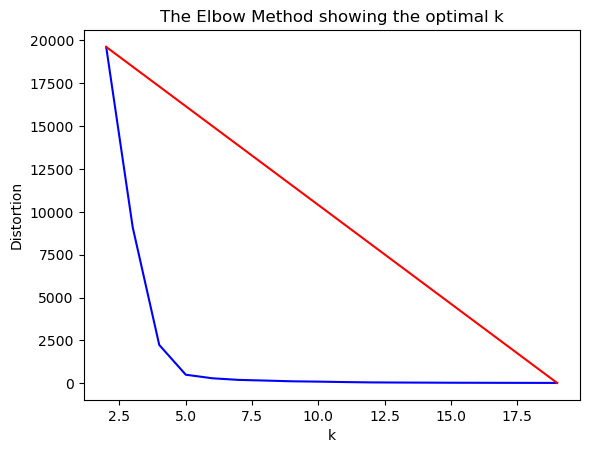

In [20]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=40)
y_pred = kmeans.fit_predict(X_reduced)
data['y'] = y_pred

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1,init='pca', perplexity=200)
X_embedded = tsne.fit_transform(X)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 262 nearest neighbors...
[t-SNE] Indexed 263 samples in 0.000s...
[t-SNE] Computed neighbors for 263 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 263 / 263
[t-SNE] Mean sigma: 39855.333995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 159.207397
[t-SNE] KL divergence after 1000 iterations: 3.237453


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


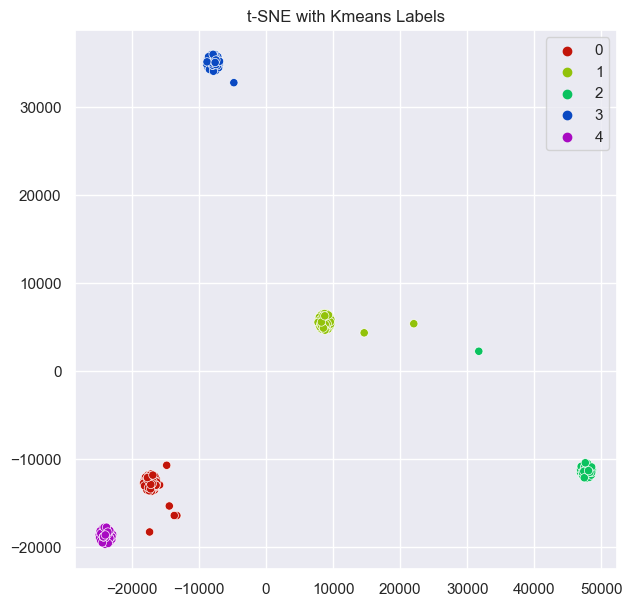

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(7,7)})

# colors
palette = sns.hls_palette(5, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
#plt.savefig("improved_cluster_tsne.png")
plt.show()